# Noise reduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [16]:
image_originale = cv2.imread('img/equalized_image.png', cv2.IMREAD_GRAYSCALE) 
image_filtree_median_gaussienne = cv2.medianBlur(image_originale, 3)

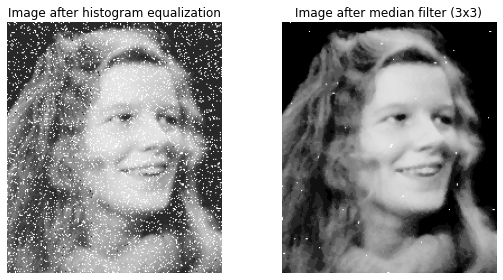

In [17]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image_originale, cmap='gray')
plt.title("Image after histogram equalization")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_filtree_median_gaussienne, cmap='gray')
plt.title('Image after median filter (3x3)')
plt.axis('off')

plt.tight_layout()
plt.savefig('img/2_plot_median_filter.jpg')
plt.show()

In [5]:
image_originale = cv2.imread('img/lena.jpg', cv2.IMREAD_GRAYSCALE)  # Charger l'image en niveaux de gris

mean = 0
variance = 0.04 * np.max(image_originale)  # Variance pour un bruit gaussien de 4%
bruit_gaussien = np.random.normal(mean, np.sqrt(variance), image_originale.shape).astype(np.uint8)
image_bruitee_gaussienne = cv2.add(image_originale, bruit_gaussien)

bruit_salt_pepper = np.random.choice([0, 255], size=image_originale.shape, p=[0.98, 0.02]).astype(np.uint8)
image_bruitee_salt_pepper = cv2.add(image_originale, bruit_salt_pepper)

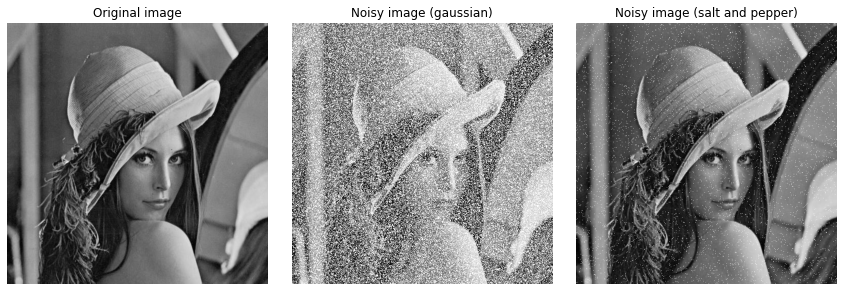

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_bruitee_gaussienne, cv2.COLOR_BGR2RGB))
plt.title("Noisy image (gaussian)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_bruitee_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title("Noisy image (salt and pepper)")
plt.axis('off')

plt.tight_layout()
plt.savefig('img/2_plot_noisy_images_lena.jpg')
plt.show()

In [8]:
kernel = np.ones((5, 5), np.float32) / 25

image_filtree_gaussienne = cv2.filter2D(image_bruitee_gaussienne, -1, kernel)

image_filtree_salt_pepper = cv2.filter2D(image_bruitee_salt_pepper, -1, kernel)

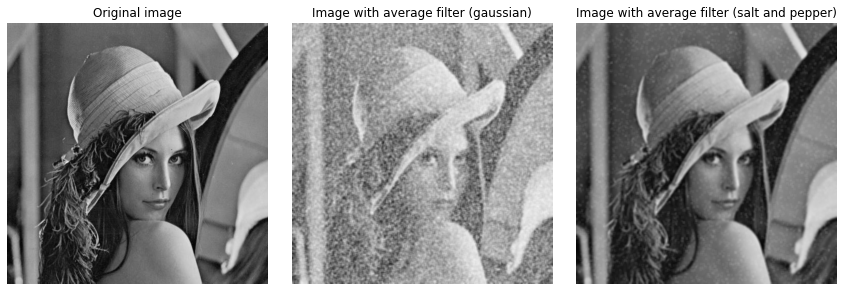

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_filtree_gaussienne, cv2.COLOR_BGR2RGB))
plt.title("Image with average filter (gaussian)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_filtree_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title("Image with average filter (salt and pepper)")
plt.axis('off')

plt.tight_layout()
plt.savefig('img/2_plot_average_filter_lena.jpg')
plt.show()

In [10]:
image_filtree_median_gaussienne = cv2.medianBlur(image_bruitee_gaussienne, 5)  # Taille du noyau : 5x5

image_filtree_median_salt_pepper = cv2.medianBlur(image_bruitee_salt_pepper, 5)  # Taille du noyau : 5x5

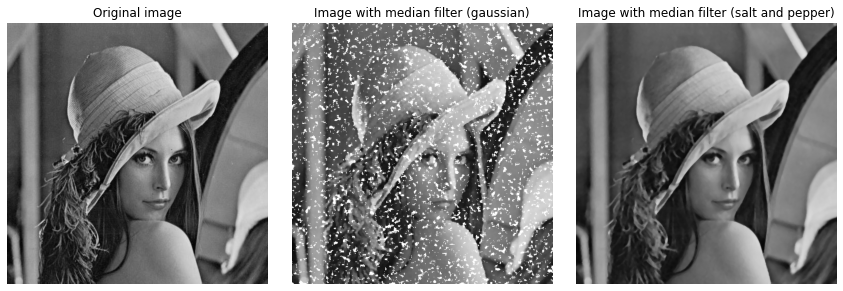

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_filtree_median_gaussienne, cv2.COLOR_BGR2RGB))
plt.title("Image with median filter (gaussian)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_filtree_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title("Image with median filter (salt and pepper)")
plt.axis('off')

plt.tight_layout()
plt.savefig('img/2_plot_median_filter_lena.jpg')
plt.show()